### Разработка модели прогнозирования для молочного хозяйства «Вольный луг»

#### Описание исследования  
Данное исследование предназначено для выявления закономерностей среди различных факторов, влияющих на качество и количество производимого молока.  
Учёт таких закономерностей потенциально позволит построить модели для прогнозирования наиболее благоприятных путей развития преприятия.  

В данном случае владелец молочного хозяйства «Вольный луг» запросил разработку моделей, которые бы позволили принять объективное решение по закупке коров для фермерского хозяйства со следующими условиями:  
    Удой должен быть больше 6000 кг.  
    Молоко должно быть вкусным.  
    
Таким образом была поставлена задача построения линейной и логистической модели с помощью машинного обучения, которые могли бы очертить варианты к приобретению коров в соответствии сформулированным фермером требованиям.  
Для проведения исследования были предоставлены три таблицы сводных данных:    
    - Данные о стаде фермера на текущий момент.     
    - Данные, содержащие имя папы каждой коровы в стаде фермера.    
    - Данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.     
В работе необходимо произвести следующие действия:    
1) Изучение общей информации:  
    - Изученеие файлов с данными, получение общей информации      
2) Предобработка данных:    
    - унификация написания названий столбцов и текстовой информации    
    - ликвидация пропусков и дублей    
    - изменение типов данных в соответствии с будущими вычислениями    
3) Исследовательский анализ:    
    - аналитика каждого параметра  
    - построение гистограмм и графиков "ящик с устами"    
    - выявление выбросов  
4) Корреляционный анализ данных:    
    - рассчёт коэффициенты корреляции между всеми признаками    
    - построение диаграмм рассеяния для признака "Удой, кг" и количественных признаков по выявленным породам    
    - определение качества связей между целевыми и входными признаками  
    - определение наличия нелинейности и мультиколлинеарности среди признаков.    
5) Построение трёх моделей линейной регрессии:    
    - выявление признаков, подходящих для построения модели  
    - построение первой модели  
    - построение второй модели с учётом нелинейности зависимости целевого и входящих признаков    
    - построение третьей модели с учётом признака "имя папы"  
    - оценка трёх моделей по метрикам R2, MSE, MAE, RMSE и выявление наилучшей модели  
    - рассчёт доверительного интервала    
    - с помощью лучшей модели прогнозирование удоя коров среди тех, которые фермер рассматривает к приобретению.    
6) Построение модели логистической регресии:  
    - построение модели по целевому признаку "вкус молока"  
    - оценка качества модели по трём метрикам: accuracy, recall, precision  
    - выявление и минимизация класса ошибки при присвоении объектам категории "вкусного молока"  
    - составление прогноза по вкусу молока коров среди тех, которые фермер рассматривает к приобретению.  
7) Итоговые выводы:  
    - отбор коров с вкусным молоком и удоем больше 6000 кг.  
    - составление рекомендаций

    


## Загрузка данных

In [1]:
!pip install --upgrade scikit-learn==1.3.2

     |████████████████████████████████| 10.9 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 70.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from scipy.stats import binom
import seaborn as sns
from math import sqrt
from scipy import stats as st
RANDOM_STATE = 42

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
np.random.seed(0)
!pip install scikit-learn --upgrade



In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


In [4]:
pd.set_option('display.max_columns', 50) 
pth1_1 = '/datasets/ferma_main.csv'
pth2_1 = 'ferma_main.csv'

pth1_2 = '/datasets/ferma_dad.csv'
pth2_2 = 'ferma_dad.csv'

pth1_3 = '/datasets/cow_buy.csv'
pth2_3 = 'cow_buy.csv'

if os.path.exists(pth1_1):
    ferma_main = pd.read_csv(pth1_1, sep=';', decimal=',')
elif os.path.exists(pth2_1):
    ferma_main = pd.read_csv(pth2_1, sep=';', decimal=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_2):
    ferma_dad = pd.read_csv(pth1_2, sep=';', decimal=',')
elif os.path.exists(pth2_2):
    ferma_dad = pd.read_csv(pth2_2, sep=';', decimal=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_3):
    cow_buy = pd.read_csv(pth1_3, sep=';', decimal=',')
elif os.path.exists(pth2_3):
    cow_buy = pd.read_csv(pth2_3, sep=';', decimal=',')
else:
    print('Something is wrong')    

In [5]:
display(ferma_main.head(5))
ferma_main.info()

display(ferma_dad.head(5))
ferma_dad.info()

display(cow_buy.head(5))
cow_buy.info()


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [6]:
#привидение к нижнему регистру названий столбцов
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()
#переименование столбцов
ferma_main = ferma_main.rename(
    columns={'удой, кг': 'удой', 
             'эке (энергетическая кормовая единица)': 'эке', 
             'сырой протеин, г': 'сырой_протеин', 
             'спо (сахаро-протеиновое соотношение)': 'спо', 
             'тип пастбища': 'тип_пастбища',
             'порода папы_быка': 'порода_папы',
             'жирность,%': 'жирность',
             'белок,%': 'белок',
             'вкус молока': 'вкус'
            
            })

ferma_dad = ferma_dad.rename(
    columns={'имя папы': 'имя_папы'})

cow_buy = cow_buy.rename(
    columns={'удой, кг': 'удой', 
             'тип пастбища': 'тип_пастбища', 
             'порода папы_быка': 'порода_папы', 
             'текущая_жирность,%': 'жирность', 
             'текущий_уровень_белок,%': 'белок',
             'порода папы_быка': 'порода_папы',
             'жирность,%': 'жирность',
             'белок,%': 'белок',
             'вкус молока': 'вкус_молока'
            
            })

In [7]:
display(ferma_main.head(5))
ferma_main.info()

display(ferma_dad.head(5))
ferma_dad.info()

display(cow_buy.head(5))
cow_buy.info()



,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   удой           634 non-null    int64  
 2   эке            634 non-null    float64
 3   сырой_протеин  634 non-null    int64  
 4   спо            634 non-null    float64
 5   порода         634 non-null    object 
 6   тип_пастбища   634 non-null    object 
 7   порода_папы    634 non-null    object 
 8   жирность       634 non-null    float64
 9   белок          634 non-null    float64
 10  вкус           634 non-null    object 
 11  возраст        634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность      20 non-null     float64
 5   белок         20 non-null     float64
 6   возраст       20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Данные были загружены и представлены в трёх таблицах.  
В первой таблице 12 столбцов и 634 строк, во второй 2 столбца и 629 строк, в третей - 7 столбцов и 20 строк.  
Характеристики в столбцах совпадают с заявленными в техническом задании.  

Названия столбцов были приведены к нижнему регистру.  
Также названия были укорочены для удобства обращения к конкрентным столбцам.  

##  Предобработка данных

In [8]:
#пропуски
display(ferma_main.isna().sum(), ferma_dad.isna().sum(), cow_buy.isna().sum())

id               0
удой             0
эке              0
сырой_протеин    0
спо              0
порода           0
тип_пастбища     0
порода_папы      0
жирность         0
белок            0
вкус             0
возраст          0
dtype: int64

id          0
имя_папы    0
dtype: int64

порода          0
тип_пастбища    0
порода_папы     0
имя_папы        0
жирность        0
белок           0
возраст         0
dtype: int64

In [9]:
#явные дубли
ferma_main.info()
ferma_dad.info()
cow_buy.info()
display(ferma_main.duplicated().sum(), ferma_dad.duplicated().sum(), cow_buy.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   удой           634 non-null    int64  
 2   эке            634 non-null    float64
 3   сырой_протеин  634 non-null    int64  
 4   спо            634 non-null    float64
 5   порода         634 non-null    object 
 6   тип_пастбища   634 non-null    object 
 7   порода_папы    634 non-null    object 
 8   жирность       634 non-null    float64
 9   белок          634 non-null    float64
 10  вкус           634 non-null    object 
 11  возраст        634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64

5

0

4

In [10]:
#удаление дублей
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)
display(ferma_main.duplicated().sum(), ferma_dad.duplicated().sum(), cow_buy.duplicated().sum())


0

0

0

In [11]:
#поиск неявных дублей
display(ferma_main['тип_пастбища'].unique(), 
        ferma_main['порода_папы'].unique(), 
        ferma_main['вкус'].unique()
       )
display(ferma_dad['имя_папы'].unique())
display(cow_buy['порода'].unique(), 
        cow_buy['тип_пастбища'].unique(), 
        cow_buy['имя_папы'].unique(), 
        cow_buy['порода_папы'].unique()
       )




#display(len(data1['name'].unique()))
#display(len(data1['user_id'].unique()))

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

In [12]:
#ликвидация неявных дублей
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['порода_папы'] = ferma_main['порода_папы'].str.replace('Айдиалл', 'Айдиал')


#приведение всех надписей к нижнему регистру
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()
ferma_main['порода_папы'] = ferma_main['порода_папы'].str.lower()
ferma_main['порода'] = ferma_main['порода'].str.lower()

ferma_dad['имя_папы'] = ferma_dad['имя_папы'].str.lower()

cow_buy['порода'] = cow_buy['порода'].str.lower()
cow_buy['имя_папы'] = cow_buy['имя_папы'].str.lower()
cow_buy['порода_папы'] = cow_buy['порода_папы'].str.lower()
ferma_main1=ferma_main



In [13]:
#изменение значений "вкусно/невкусно" на "1/0"
ferma_main['вкус'] = ferma_main['вкус'].str.replace('не вкусно', '0')
ferma_main['вкус'] = ferma_main['вкус'].str.replace('вкусно', '1')

#изменение значений "более 2 лет/менее 2 лет" на "1/0"
ferma_main['возраст'] = ferma_main['возраст'].str.replace('менее_2_лет', '0')
ferma_main['возраст'] = ferma_main['возраст'].str.replace('более_2_лет', '1')

In [14]:
display(ferma_main['тип_пастбища'].unique(), 
        ferma_main['порода_папы'].unique(), 
        ferma_main['вкус'].unique()
       )
display(ferma_dad['имя_папы'].unique())
display(cow_buy['порода'].unique(), 
        cow_buy['тип_пастбища'].unique(), 
        cow_buy['имя_папы'].unique(), 
        cow_buy['порода_папы'].unique()
       )


array(['равнинное', 'холмистое'], dtype=object)

array(['айдиал', 'соверин'], dtype=object)

array(['1', '0'], dtype=object)

array(['буйный', 'соловчик', 'барин', 'геркулес'], dtype=object)

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['геркулес', 'буйный', 'барин', 'соловчик'], dtype=object)

array(['айдиал', 'соверин'], dtype=object)

In [15]:
display(ferma_main.head(5), ferma_dad.head(5), cow_buy.head(5))


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0


,id,имя_папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [16]:
ferma_main.info()
ferma_dad.info()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   удой           629 non-null    int64  
 2   эке            629 non-null    float64
 3   сырой_протеин  629 non-null    int64  
 4   спо            629 non-null    float64
 5   порода         629 non-null    object 
 6   тип_пастбища   629 non-null    object 
 7   порода_папы    629 non-null    object 
 8   жирность       629 non-null    float64
 9   белок          629 non-null    float64
 10  вкус           629 non-null    object 
 11  возраст        629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64

Данные были предобработаны.  
Были удалены явные и неявные дубликаты (ошибки при написании данных).  
Были заменены значения в столбцах "вкус" и "возраст" на бинарные 0 и 1 для простоты расчётов.  
Благодаря этому количеству строк в первых двух таблицах совпадает.  
Вся текстовая информация приведена к нижнему регистру.  
Пропуски не были обнаружены.    
Типы данных подходят в изначальном виде, изменений не было произведено.


## Исследовательский анализ данных

In [17]:
ferma_main.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
5%,32.40000,5359.200000,12.300000,1682.400000,0.850000,3.210000,3.071000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
95%,597.60000,6871.600000,16.500000,2261.000000,0.950000,3.730000,3.080000
99%,622.72000,7164.040000,16.700000,2337.440000,0.950000,3.740000,3.081000


    id   удой   эке  сырой_протеин   спо          порода тип_пастбища  \
16  17  45616  11.5           1675  0.93  вис бик айдиал    холмистое   

   порода_папы  жирность  белок вкус возраст  
16      айдиал      3.22  3.076    1       1  


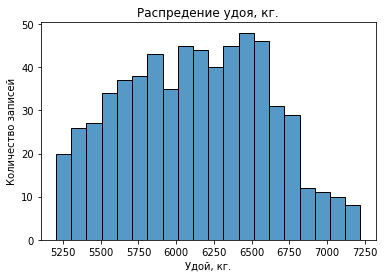

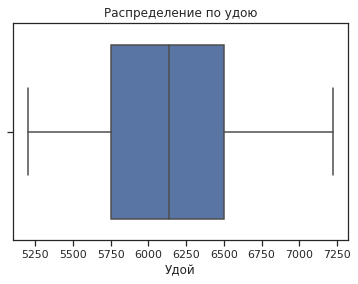

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
5%       5359.200000
25%      5751.000000
50%      6133.000000
75%      6501.000000
95%      6863.800000
99%      7138.760000
max      7222.000000
Name: удой, dtype: float64

In [18]:
#анализ удоя
#замена выброса на медианное значение
print(ferma_main.query('удой > 7222'))
ferma_main.loc[(ferma_main['удой'] > 7222), 'удой'] = ferma_main['удой'].median()


ax = sns.histplot(ferma_main['удой'] , bins=20)
ax.set_title('Распредение удоя, кг.') 
plt.xlabel('Удой, кг.')
plt.ylabel('Количество записей')


plt.show()

sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['удой'])
ax.set_title('Распределение по удою')
ax.set_xlabel('Удой')


plt.show()
ferma_main['удой'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

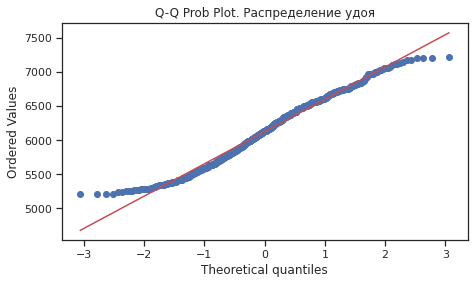

In [19]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['удой'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение удоя')
plt.show()

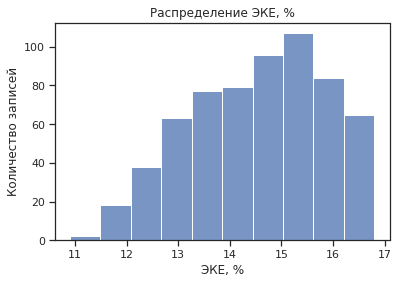

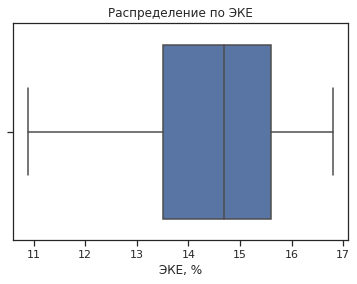

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
5%        12.300000
25%       13.500000
50%       14.700000
75%       15.600000
95%       16.500000
99%       16.700000
max       16.800000
Name: эке, dtype: float64

In [20]:
#анализ эке
ax = sns.histplot(ferma_main['эке'], bins=10)

ax.set_title('Распределение ЭКЕ, %') 
plt.xlabel('ЭКЕ, %')
plt.ylabel('Количество записей')


plt.show()

sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['эке'])
ax.set_title('Распределение по ЭКЕ')
ax.set_xlabel('ЭКЕ, %')


plt.show()
ferma_main['эке'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

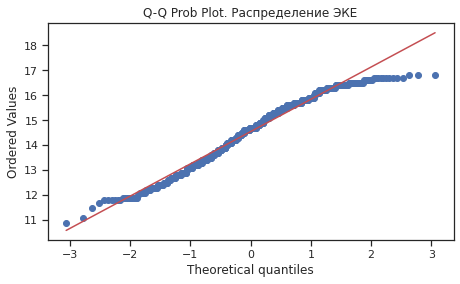

In [21]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['эке'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение ЭКЕ')
plt.show()

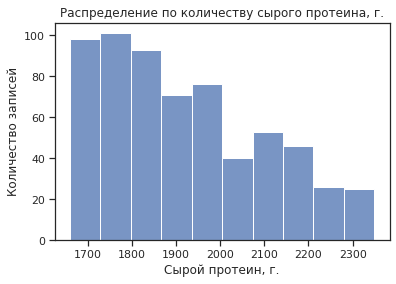

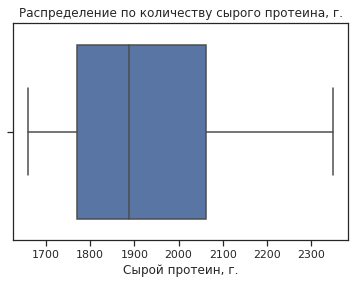

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
5%       1682.400000
25%      1771.000000
50%      1888.000000
75%      2062.000000
95%      2261.000000
99%      2337.440000
max      2349.000000
Name: сырой_протеин, dtype: float64

In [22]:
#анализ сырого протеина
ax = sns.histplot(ferma_main['сырой_протеин'], bins=10)

ax.set_title('Распределение по количеству сырого протеина, г.') 
plt.xlabel('Сырой протеин, г.')
plt.ylabel('Количество записей')


plt.show()

sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['сырой_протеин'])
ax.set_title('Распределение по количеству сырого протеина, г.')
ax.set_xlabel('Сырой протеин, г.')


plt.show()
ferma_main['сырой_протеин'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

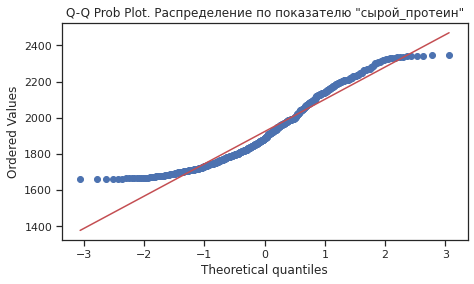

In [23]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['сырой_протеин'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение по показателю "сырой_протеин"')
plt.show()

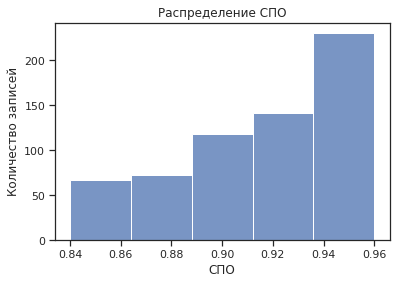

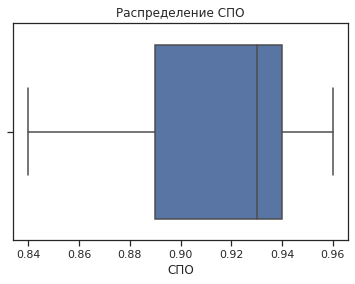

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
5%         0.850000
25%        0.890000
50%        0.930000
75%        0.940000
95%        0.950000
99%        0.950000
max        0.960000
Name: спо, dtype: float64

In [24]:
#анализ спо
ax = sns.histplot(ferma_main['спо'], bins=5)

ax.set_title('Распределение СПО') 
plt.xlabel('СПО')
plt.ylabel('Количество записей')


plt.show()

sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['спо'])
ax.set_title('Распределение СПО')
ax.set_xlabel('СПО')


plt.show()
ferma_main['спо'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

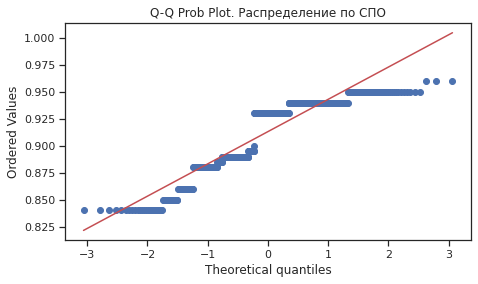

In [25]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['спо'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение по СПО')
plt.show()

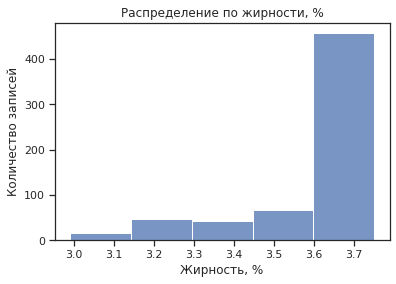

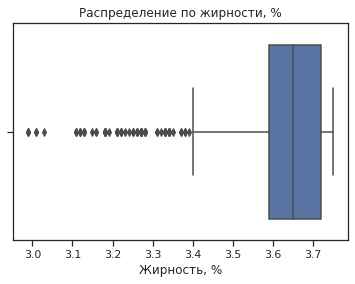

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
5%         3.210000
25%        3.590000
50%        3.650000
75%        3.720000
95%        3.730000
99%        3.740000
max        3.750000
Name: жирность, dtype: float64

In [26]:
#анализ жирности
ax = sns.histplot(ferma_main['жирность'], bins=5)

ax.set_title('Распределение по жирности, %') 
plt.xlabel('Жирность, %')
plt.ylabel('Количество записей')


plt.show()

sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['жирность'])
ax.set_title('Распределение по жирности, %')
ax.set_xlabel('Жирность, %')


plt.show()

ferma_main['жирность'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

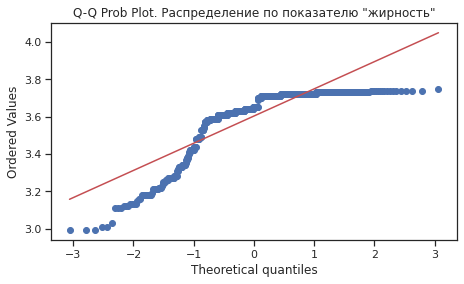

In [27]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['жирность'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение по показателю "жирность"')
plt.show()

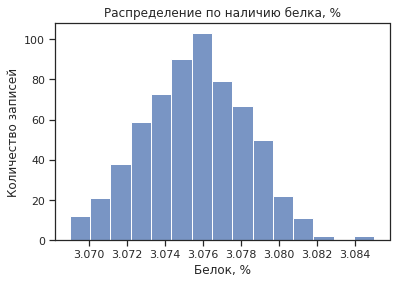

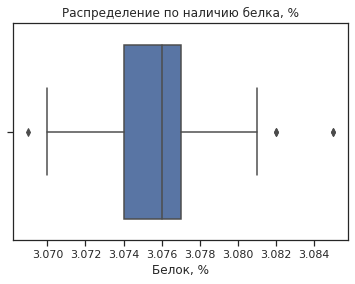

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
5%         3.071000
25%        3.074000
50%        3.076000
75%        3.077000
95%        3.080000
99%        3.081000
max        3.085000
Name: белок, dtype: float64

In [28]:
#анализ белка
ax = sns.histplot(ferma_main['белок'], bins=15)

ax.set_title('Распределение по наличию белка, %') 
plt.xlabel('Белок, %')
plt.ylabel('Количество записей')


plt.show()


sns.set(style="ticks")
ax = sns.boxplot(data=ferma_main, x= ferma_main['белок'])
ax.set_title('Распределение по наличию белка, %')
ax.set_xlabel('Белок, %')


plt.show()
ferma_main['белок'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]) 

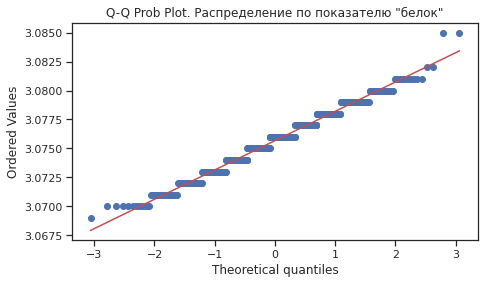

In [29]:
plt.figure(figsize=(16,4))
ax = plt.subplot(121)
st.probplot(ferma_main['белок'], dist="norm", plot=plt)
ax.set_title('Q-Q Prob Plot. Распределение по показателю "белок"')
plt.show()

вис бик айдиал     373
рефлешнсоверинг    256
Name: порода, dtype: int64

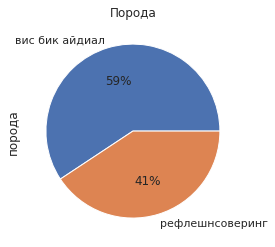

In [30]:
#анализ породы коровы
display(ferma_main['порода'].value_counts())
ferma_main['порода'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Порода')



plt.show()

айдиал     318
соверин    311
Name: порода_папы, dtype: int64

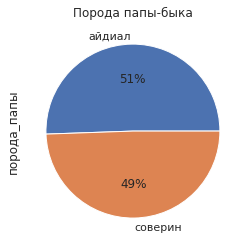

In [31]:
#анализ породы папы быка
display(ferma_main['порода_папы'].value_counts())
ferma_main['порода_папы'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Порода папы-быка')
plt.show()

1    371
0    258
Name: вкус, dtype: int64

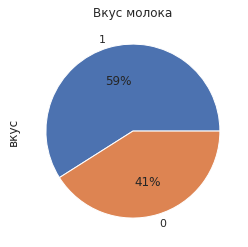

In [32]:
#анализ вкуса молока
display(ferma_main['вкус'].value_counts())
ferma_main['вкус'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Вкус молока')
plt.show()

1    519
0    110
Name: возраст, dtype: int64

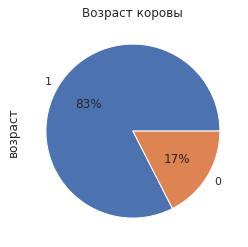

In [33]:
#анализ возраста коровы
display(ferma_main['возраст'].value_counts())
ferma_main['возраст'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Возраст коровы')
plt.show()

Был проведён статистический анализ таблицы ferma_main.  Были выявлены следующие осоебнности:  
    1) Коров старше 2-ух лет 83%, остальные - моложе 2-ух лет    
    2) 59% молока - вкусное    
    3) 51% пап-быков породы айдал, остальные 49% - соверин    
    4) 59% коров породы Вис Бик Айдиал, остальные 41% - породы РефлешнСоверинг  
    5) Распределению по проценту белка имеет ненормальный вид, среднее и медианное значение близки. Замечено небольшое количество выборосов.  
    6) в столбце "удой" наблюдается один очевидный выброс, который оказывает сильное влияние на наблюдение. Среднее (6125) и медианное (6133) близки.   
    5% значение меньше 5359, 99% значений меньше 7138. Распределение имеет нормальный вид со скосом вправо, превалируют низкие показатели.  
    7) Распределение по ЭКЕ имеет нормальный вид со скосом влево, превалируют высокие показатели. Среднее (14.5438) и медианное (14.7) значения близки.  
    8) Распределение по количеству сырого протеина смещено вправо, имеет не нормальный вид,  превалируют низкие показатели.   
    Среднее (1923.36) и медианное(1888) значения близки.  
    9) Распределение по СПО сильно спещено вправо, имеет не нормальный вид, превалируют высокие показатели.   
    Среднее (0.913) и медианное(0.93) сильно различаются.   
    10) Распределение по проценту жирности сильно смещено влево, имеет не нормальный вид. Среднее (3.603) и медианное(3.65) сильно различаются. Замечено большое количество выбросов в меньшую сторону.   
    
    
    
    

## Корреляционный анализ

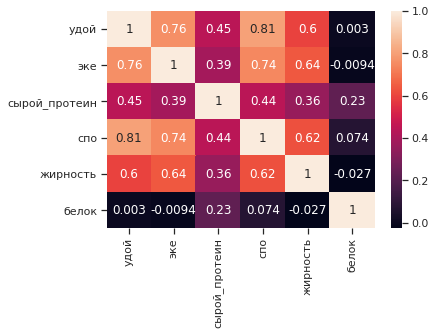

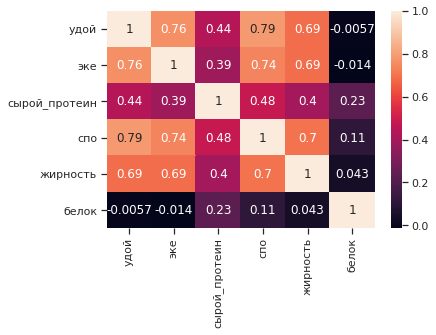

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст
0,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1
1,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0
2,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1
3,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1
4,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0


In [34]:
ferma_analys = ferma_main.drop('id', axis=1)
sns.heatmap(ferma_analys[['удой','эке','сырой_протеин', 'спо', 'жирность', 'белок']].corr(), annot=True)
plt.show()





sns.heatmap(ferma_analys[['удой','эке','сырой_протеин', 'спо', 'жирность', 'белок']].corr(method='spearman'), annot=True)
plt.show()


display(ferma_analys.head(5))

Распределение характеристик "жирность", "белок", "спо" носит ненормальный вид.  
Для вычисления корреляции числовых признаков с учётом характера их распределений, был применён метод Спирмена, учитывающий ненормальность распределения.   
Замечаем, что с показателем удоя есть ненулевая степень корреляции у параметров "эке", "сырой_проетин", "спо", "жирность".  
Корреляция с показателем "белок" отсутствует.   
Для построения линейной регрессии не будем брать характеристики, отражающие качество молока: "белок", "жирность". 
Будут учитываться численные характеристики, связанные с услолвиями питания коров: "эке", "спо", "сырой_протеин"


In [35]:
#группируем по породе коров
ferma_aidal = ferma_main.query('порода == "вис бик айдиал"')
ferma_sovering = ferma_main.query('порода == "рефлешнсоверинг"')


display(ferma_aidal.head(5))
display(ferma_sovering.head(5))


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0
6,7,5910.0,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,1,1
7,8,6179.0,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,1,1


,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1
5,6,5254.0,12.7,1806,0.885,рефлешнсоверинг,холмистое,соверин,3.13,3.078,1,0
8,9,6783.0,14.2,1918,0.940,рефлешнсоверинг,холмистое,айдиал,3.71,3.077,1,1
10,11,5591.0,13.7,1678,0.895,рефлешнсоверинг,холмистое,айдиал,3.13,3.075,1,0


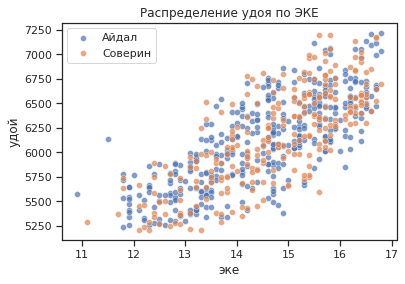

In [36]:
#строим график распределения удоя по различным показателям для двух пород
ax1 = sns.scatterplot(data=ferma_aidal, x='эке', y='удой', alpha=0.7, label='Айдал')
ax2 = sns.scatterplot(data=ferma_sovering, x='эке', y='удой', alpha=0.7, label='Соверин')
ax1.set_title('Распределение удоя по ЭКЕ')
plt.show()

Замечаем нелинейную зависимость удоя от эке. Чтобы избежать её в будущем можем воспользоваться квадратами значений ЭКЕ.

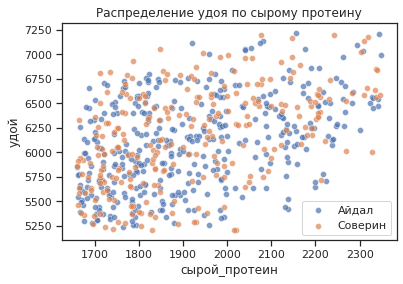

In [37]:
ax1 = sns.scatterplot(data=ferma_aidal, x='сырой_протеин', y='удой', alpha=0.7, label='Айдал')
ax2 = sns.scatterplot(data=ferma_sovering, x='сырой_протеин', y='удой', alpha=0.7, label='Соверин')
ax1.set_title('Распределение удоя по сырому протеину')
plt.show()

Видим, что зависимость не формируется. Это подтверждает низкие коэффициент корреляции.  
Потенциально также можем не брать при формировании модели.

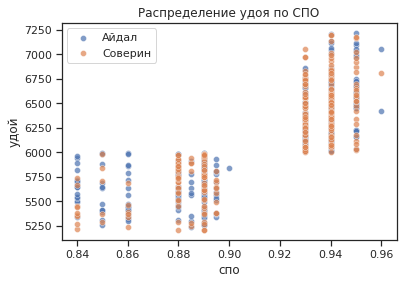

In [38]:
ax1 = sns.scatterplot(data=ferma_aidal, x='спо', y='удой', alpha=0.7, label='Айдал')
ax2 = sns.scatterplot(data=ferma_sovering, x='спо', y='удой', alpha=0.7, label='Соверин')
ax1.set_title('Распределение удоя по СПО')
plt.show()

Замечаем, что показатели разделились на группы меньше 0.91 и больше 0.91. В дальнейшем можем пользоваться категориальным обозначением

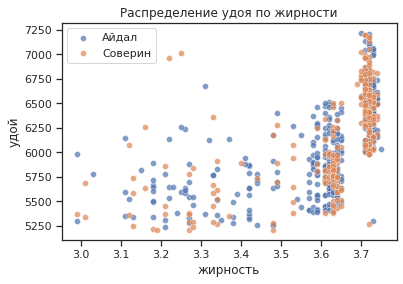

In [39]:
ax1 = sns.scatterplot(data=ferma_aidal, x='жирность', y='удой', alpha=0.7, label='Айдал')
ax2 = sns.scatterplot(data=ferma_sovering, x='жирность', y='удой', alpha=0.7, label='Соверин')
ax1.set_title('Распределение удоя по жирности')
plt.show()

Видим, что данные в основном сгруппировались на прмежутке 3.6 - 3.7. Показатели меньше 3.5 можно считать выбросами. Однако выбросов много (больше 10%) поэтому мы не можем позволить себе избавиться от этих данных

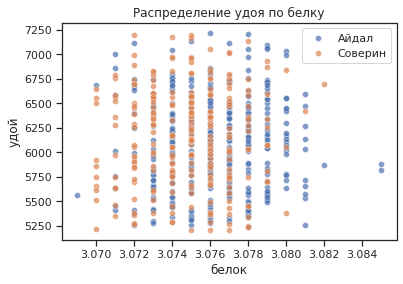

In [40]:
ax1 = sns.scatterplot(data=ferma_aidal, x='белок', y='удой', alpha=0.7, label='Айдал')
ax2 = sns.scatterplot(data=ferma_sovering, x='белок', y='удой', alpha=0.7, label='Соверин')
ax1.set_title('Распределение удоя по белку')
plt.show()

1) Сильнее всего показатели удоя корреклируют с параметрами "эке", "сырой_проетин", "спо", "жирность". С показателем белка почти не коррелирует.  
2) Взаимосвязь удоя с ЭКЕ нелинейная. Нужно ввести квадрат этого параметра.  
3) Мультиколлинеарность между признаками не наблюдается    
4) Взаимосвязь удоя и СПО нелинейна, СПО можно перевести в категориальный вид.    
5) Очевидно, что сильнее всего на количество производимого молока влияет прежде всего качество потребляемой пищи и условия пастбищ. Из количественных показателей это "эке", "спо" и "Сырой протеин".   
    Из категориальных : "порода", "возраст", "порода папы", "тип пастбища" и "имя папы". Будем учитывать это при построении моделей прогнозирования удоя.  
6) Исключаем из рассмотрения показатели качества молока : "белок" и "жирность"        

## Обучение модели линейной регрессии

#### Первая модель LinearRegression

In [41]:

RANDOM_STATE = 42



X = ferma_analys.drop('удой', axis=1)
y = ferma_analys['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['возраст', 'порода', 'тип_пастбища', 'порода_папы']
num_col_names = ['эке',
                 'сырой_протеин',
                 'спо']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse_output=False)


X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out() 


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)



model_lr1  = LinearRegression()


model_lr1  = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions1 = model_lr1.predict(X_test)


r2_1  = r2_score(y_test, predictions1) 
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1 = mean_squared_error(y_test, predictions1) 
rmse_1 = mean_squared_error(y_test, predictions1, squared=False) 


print(f"R2  = {r2_1:.3f}")
print(f"MAE  = {mae_1:.0f}")
print(f"MSE = {mse_1:.0f}")
print(f"RMSE = {rmse_1:.0f}")

R2  = 0.819
MAE  = 181
MSE = 49615
RMSE = 223


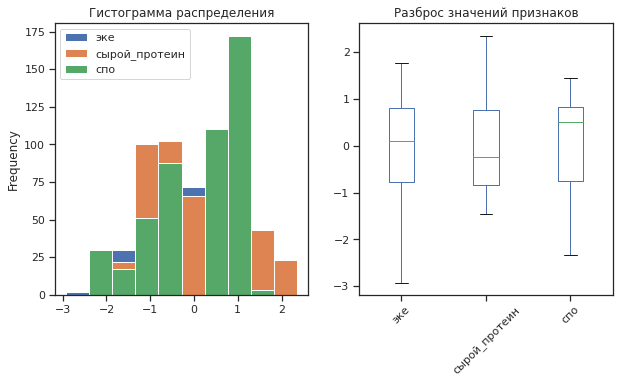

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

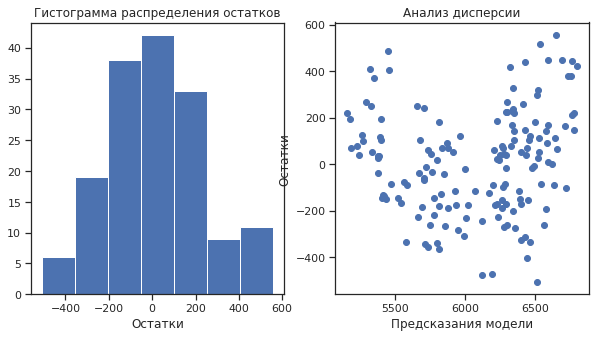

count    158.000000
mean      12.046194
std      223.125600
min     -507.199371
25%     -152.380090
50%       30.750577
75%      147.653446
max      556.683400
Name: удой, dtype: float64

In [43]:
residuals = y_test-predictions1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals, bins = 7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions1, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

display(residuals.describe())


Вид гистграммы распределения остатков близок к нормальному. Отклонение от нуля среднего значения вправо на 15.   
Диаграмма рассеяния имеет вид дуги - остатки распределены неравномерно, значит модель требует усовершенствования.  
Показатель R2 = 0.819. Чем ближе R² к единице, тем точнее работает модель.

#### Построение второй модели

In [44]:
#преобразование СПО в категориальный бинарный признак, использовав эту границу
ferma_main['спо2'] = ferma_main['спо'].apply(lambda x: 'спо не более 0.91' if x <= 0.91 else 'спо более 0.91')
ferma_main['эке2'] = ferma_main['эке'] ** 2
display(ferma_main.head(5))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст,спо2,эке2
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1,спо не более 0.91,201.64
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0,спо не более 0.91,163.84
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1,спо не более 0.91,196.00
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1,спо не более 0.91,153.76
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0,спо не более 0.91,163.84


In [45]:

#изменение значений "СПО2" на "1/0"
ferma_main['спо2'] = ferma_main['спо2'].str.replace('спо не более 0.91', '0')
ferma_main['спо2'] = ferma_main['спо2'].str.replace('спо более 0.91', '1')
ferma_analys2 = ferma_main.drop('id', axis=1)
RANDOM_STATE = 42



X = ferma_analys2.drop('удой', axis=1)
y = ferma_analys2['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['возраст', 'порода', 'тип_пастбища', 'порода_папы','спо2']
num_col_names = ['эке2',
                 'сырой_протеин']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop='first', sparse_output=False)


X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out() 


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)



model_lr2  = LinearRegression()


model_lr2  = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions2 = model_lr2.predict(X_test)


r2_2  = r2_score(y_test, predictions2) 
mae_2 = mean_absolute_error(y_test, predictions2)
mse_2 = mean_squared_error(y_test, predictions2) 
rmse_2 = mean_squared_error(y_test, predictions2, squared=False) 

print(f"R2  = {r2_2:.3f}")
print(f"MAE = {mae_2:.0f}")
print(f"MSE = {mse_2:.0f}")
print(f"RMSE = {rmse_2:.0f}")

R2  = 0.844
MAE = 164
MSE = 42834
RMSE = 207


/tmp/ipykernel_48/2474107725.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ferma_main['спо2'] = ferma_main['спо2'].str.replace('спо не более 0.91', '0')
/tmp/ipykernel_48/2474107725.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ferma_main['спо2'] = ferma_main['спо2'].str.replace('спо более 0.91', '1')


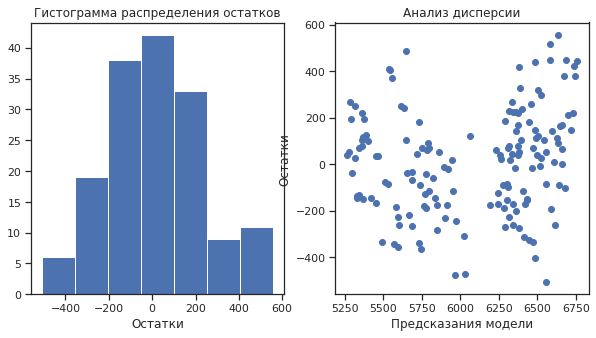

count    158.000000
mean      10.488883
std      207.356044
min     -549.834958
25%     -129.545037
50%        0.235810
75%      144.825371
max      566.726353
Name: удой, dtype: float64

In [46]:
residuals2 = y_test-predictions2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals, bins = 7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions2, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

display(residuals2.describe())


Показание стреднего 13 вправо. Вид диспресии всё ещё представлят собой дугу, но уже более размытую.  
R2 = 0.835
Эта модель лучше предыдущей.

#### Построение третьей модели

In [47]:
ferma_main_dad = ferma_main.merge(ferma_dad, on='id', how='left')

ferma_main_dad['имя_папы2'] = ferma_main_dad['порода_папы'] + ferma_main_dad['имя_папы']
display(ferma_main_dad.head(10))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст,спо2,эке2,имя_папы,имя_папы2
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1,0,201.64,буйный,айдиалбуйный
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0,0,163.84,соловчик,соверинсоловчик
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1,0,196.00,барин,соверинбарин
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1,0,153.76,буйный,айдиалбуйный
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0,0,163.84,барин,соверинбарин
5,6,5254.0,12.7,1806,0.885,рефлешнсоверинг,холмистое,соверин,3.13,3.078,1,0,0,161.29,барин,соверинбарин
6,7,5910.0,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,1,1,0,174.24,соловчик,соверинсоловчик
7,8,6179.0,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,1,1,1,216.09,геркулес,айдиалгеркулес
8,9,6783.0,14.2,1918,0.940,рефлешнсоверинг,холмистое,айдиал,3.71,3.077,1,1,1,201.64,буйный,айдиалбуйный
9,10,5339.0,13.4,1791,0.895,вис бик айдиал,холмистое,соверин,3.13,3.075,1,0,0,179.56,барин,соверинбарин


In [48]:
ferma_analys3 = ferma_main_dad.drop('id', axis=1)
RANDOM_STATE = 42

# считываем CSV-файл в датафрейм pandas, разделяем выборки

X = ferma_analys3.drop('удой', axis=1)
y = ferma_analys3['удой']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names3 = [ 'возраст', 'порода', 'тип_пастбища', 'имя_папы', 'порода_папы', 'спо2']
num_col_names3 = ['эке2',
                 'сырой_протеин']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names3])
X_test_scaled = scaler.transform(X_test[num_col_names3])

encoder = OneHotEncoder(drop='first', sparse_output=False)


X_train_ohe = encoder.fit_transform(X_train[cat_col_names3])
X_test_ohe = encoder.transform(X_test[cat_col_names3])

encoder_col_names = encoder.get_feature_names_out() 


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names3)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names3)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)



model_lr3  = LinearRegression()


model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions3 = model_lr3.predict(X_test)


r2_3  = r2_score(y_test, predictions3) 
mae_3 = mean_absolute_error(y_test, predictions3)
mse_3 = mean_squared_error(y_test, predictions3) 
rmse_3 = mean_squared_error(y_test, predictions3, squared=False) 


first = np.quantile(predictions3, 0.05)
second = np.quantile(predictions3, 0.95)


print(f"R2  = {r2_3:.3f}")
print(f"MAE  = {mae_3:.0f}")
print(f"MSE = {mse_3:.0f}")
print(f"RMSE = {rmse_3:.0f}")
print(f"Доверительный иинтервал = {first:.0f} {second:.0f}")

R2  = 0.863
MAE  = 153
MSE = 37651
RMSE = 194
Доверительный иинтервал = 5341 6697


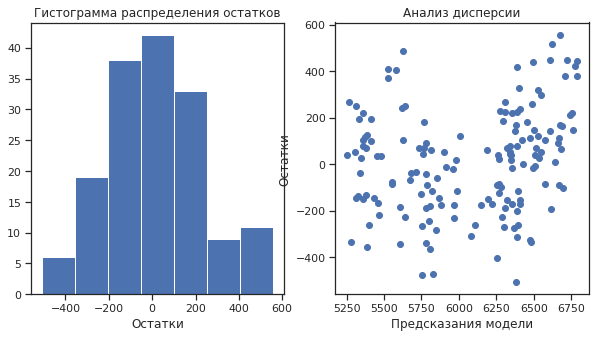

count    158.000000
mean      16.595314
std      193.943463
min     -398.341317
25%     -110.236813
50%       -1.816708
75%      155.141224
max      528.234153
Name: удой, dtype: float64

In [49]:
residuals3 = y_test-predictions3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals, bins = 7)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions3, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

display(residuals3.describe())

Вид гистграммы распределения остатков близок к нормальному. Отклонение от нуля среднего значения вправо на 17.   
Диаграмма рассеяния имеет вид дуги, но менее выраженно.
Показатель R2 = 0.869. 

In [50]:
display(r2_1, mae_1, mse_1, rmse_1)
display(r2_2, mae_2, mse_2, rmse_2)
display(r2_3, mae_3, mse_3, rmse_3)

0.8189336328735966

181.03876471186916

49615.04881247561

222.74435753229668

0.8436790410146533

163.8932213835152

42834.41554364739

206.9647688464087

0.8625940367657647

153.403462972581

37651.40749873525

194.03970598497423

Сопоставим показатели каждой модели.    
- Модель 1:  
R2  = 0.819
MAE  = 181
MSE = 49615
RMSE = 223     
- Модель 2:  
R2  = 0.844
MAE = 164
MSE = 42834
RMSE = 207     
- Модель 3:  
R2  = 0.863
MAE  = 153
MSE = 37651
RMSE = 194       
Видим, что все три метрики у третьей модели приближаются к нулю. А показатель R2 - к единице.  
Значит, третья модель - наилучшая.  
Доверительный интервал к удою: 5341 - 6697 (кг) - с границами 5% и 95% всех показателей.    
    

#### Предказание удоя коров

In [51]:
display(ferma_main_dad.head(5), cow_buy.head(5))
display(ferma_main_dad['имя_папы2'].unique())
display(ferma_aidal['спо'].mean(), ferma_sovering['спо'].mean())

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст,спо2,эке2,имя_папы,имя_папы2
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,1,0,201.64,буйный,айдиалбуйный
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,0,0,163.84,соловчик,соверинсоловчик
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,0,1,0,196.00,барин,соверинбарин
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,0,1,0,153.76,буйный,айдиалбуйный
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,0,0,163.84,барин,соверинбарин


,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


array(['айдиалбуйный', 'соверинсоловчик', 'соверинбарин',
       'айдиалгеркулес', 'айдиалбарин', 'айдиалсоловчик'], dtype=object)

0.9114879356568364

0.9154882812499998

In [52]:
#сгруппируем таблицы и добавим недостающие данные
ferma_grouped=ferma_main_dad.groupby('порода')['спо','эке2', 'сырой_протеин'].mean().reset_index()
display(ferma_grouped.head(5))


/tmp/ipykernel_48/21765885.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ferma_grouped=ferma_main_dad.groupby('порода')['спо','эке2', 'сырой_протеин'].mean().reset_index()


,порода,спо,эке2,сырой_протеин
0,вис бик айдиал,0.911488,210.176220,1921.957105
1,рефлешнсоверинг,0.915488,217.675547,1925.414062


In [53]:
cow_buy_merged = cow_buy.merge(ferma_grouped, on='порода', how='left')
display(cow_buy_merged.head(5))



,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,спо,эке2,сырой_протеин
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.911488,210.176220,1921.957105
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.911488,210.176220,1921.957105
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.915488,217.675547,1925.414062
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.915488,217.675547,1925.414062
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.915488,217.675547,1925.414062


In [54]:
cow_buy_merged1=cow_buy_merged
cow_buy_merged[['спо','эке2', 'сырой_протеин']] = cow_buy_merged[['спо','эке2', 'сырой_протеин']] + \
cow_buy_merged[['спо','эке2', 'сырой_протеин']] *0.05

display(cow_buy_merged.head(5))




,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,спо,эке2,сырой_протеин
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.957062,220.685031,2018.054960
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.957062,220.685031,2018.054960
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.961263,228.559324,2021.684766
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.961263,228.559324,2021.684766
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.961263,228.559324,2021.684766


In [55]:
cow_buy_merged['имя_папы2'] = cow_buy_merged['порода_папы'] + cow_buy_merged['имя_папы']
cow_buy_merged['возраст'] = cow_buy_merged['возраст'].str.replace('менее_2_лет', '0')
cow_buy_merged['возраст'] = cow_buy_merged['возраст'].str.replace('более_2_лет', '1')

display(cow_buy_merged.head(5))
display(cow_buy_merged['имя_папы2'].unique())

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,спо,эке2,сырой_протеин,имя_папы2
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,0.957062,220.685031,2018.054960,айдиалгеркулес
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,0.957062,220.685031,2018.054960,соверинбуйный
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,0.961263,228.559324,2021.684766,соверинбарин
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,0.961263,228.559324,2021.684766,айдиалбуйный
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,0.961263,228.559324,2021.684766,айдиалбуйный


array(['айдиалгеркулес', 'соверинбуйный', 'соверинбарин', 'айдиалбуйный',
       'соверингеркулес', 'соверинсоловчик'], dtype=object)

In [56]:
cow_buy_merged['спо2'] = cow_buy_merged['спо'].apply(lambda x: '0' if x < 0.96 else '1')

display(cow_buy_merged.head(5))

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,спо,эке2,сырой_протеин,имя_папы2,спо2
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,0.957062,220.685031,2018.054960,айдиалгеркулес,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,0.957062,220.685031,2018.054960,соверинбуйный,0
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,0.961263,228.559324,2021.684766,соверинбарин,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,0.961263,228.559324,2021.684766,айдиалбуйный,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,0.961263,228.559324,2021.684766,айдиалбуйный,1


In [57]:




cat_col_names3 = ['возраст', 'порода', 'тип_пастбища', 'имя_папы', 'порода_папы', 'спо2']
num_col_names3 = ['эке2','сырой_протеин']

data_cow_encoded = encoder.transform(cow_buy_merged[cat_col_names3])
data_cow_scaled = scaler.transform(cow_buy_merged[num_col_names3])

cow_buy_merged_prep = np.hstack([data_cow_encoded, data_cow_scaled])


predicted_udoy_for_new_data = model_lr3.predict(cow_buy_merged_prep)


cow_buy_merged['удой2'] = predicted_udoy_for_new_data


result3 = ['порода', 'тип_пастбища', 'возраст', 'имя_папы', 'порода_папы', 'спо2', 'эке2', 'жирность', 'белок', 'удой2']
display(cow_buy_merged[result3].head(20))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,порода,тип_пастбища,возраст,имя_папы,порода_папы,спо2,эке2,жирность,белок,удой2
0,вис бик айдиал,холмистое,1,геркулес,айдиал,0,220.685031,3.58,3.076,6125.958159
1,вис бик айдиал,равнинное,0,буйный,соверин,0,220.685031,3.54,3.081,5870.057722
2,рефлешнсоверинг,равнинное,1,барин,соверин,1,228.559324,3.59,3.074,6270.293019
3,рефлешнсоверинг,холмистое,1,буйный,айдиал,1,228.559324,3.40,3.061,6577.146960
4,рефлешнсоверинг,равнинное,1,буйный,айдиал,1,228.559324,3.64,3.074,6524.502967
5,рефлешнсоверинг,равнинное,0,геркулес,соверин,1,228.559324,3.63,3.053,6322.916566
6,вис бик айдиал,равнинное,1,буйный,соверин,0,220.685031,3.57,3.079,6078.232427
7,рефлешнсоверинг,холмистое,0,буйный,айдиал,1,228.559324,3.40,3.079,6368.972255
8,вис бик айдиал,холмистое,1,соловчик,соверин,0,220.685031,3.73,3.055,5924.505070
9,рефлешнсоверинг,равнинное,1,геркулес,соверин,1,228.559324,3.73,3.073,6531.091271


Было получено предсказание удоя коров по третьей модели

В данной части работы были разработаны три модели линейной регрессии.  
В качестве целевых численных параметров были взяты "эке" и "спо" и "сырой_протеин", отражающие качество питания коров.  
Категориальными признаками были взяты все остальные параметры, кроме "вкус", "жирность" и "белок" - они отражают качество молока.  
Качество каждой из них было оценено с помощью метрик R2, MAE, MSE, RMSE.  
Была выявлена наилучшая модель - третья имеет показатель R2 ближайший к еденице, а показатели MAE, MSE, RMSE ближе к нулю.   
Резултат показывает нам правильность действий в ходе адаптации данных при построении моделей:  
    - была устранена нелинейность зависимости целевого и выходных данных  
    - добавлена категория "имя_папы"  
    
Доверительный интервал удоя был взят в границах от 5 до 95% всех показателей и составил 5341 - 6697 (кг).   
Было составлено предсказание по третьей модели на удой для коров, рассматриваемых к приобретению. Данные добавлены в таблицу.  
Все предсказанные значения попали внутрь доверительного интервала.  

## Обучение модели логистической регрессии

Для построения модели логистической регресии обратим внимания прежде всего на параметры, которые потенциально могут влиять на качество молока: параметры питания, условния пастбищ, возраст и происхождение.  
К таким параметрам можно отнести все, кроме параметра "удой"

In [58]:
#подготовка данных
#изменение значений "вкусно/невкусно" на "1/0"
ferma_main1['вкус'] = ferma_main1['вкус'].str.replace('0', 'не вкусно')
ferma_main1['вкус'] = ferma_main1['вкус'].str.replace('1', 'вкусно' )

#изменение значений "более 2 лет/менее 2 лет" на "1/0"
ferma_main1['возраст'] = ferma_main1['возраст'].str.replace('0', 'менее_2_лет')
ferma_main1['возраст'] = ferma_main1['возраст'].str.replace('1', 'более_2_лет')
display(ferma_main1.head(10))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст,спо2,эке2
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84
5,6,5254.0,12.7,1806,0.885,рефлешнсоверинг,холмистое,соверин,3.13,3.078,вкусно,менее_2_лет,0,161.29
6,7,5910.0,13.2,1792,0.885,вис бик айдиал,равнинное,соверин,3.48,3.077,вкусно,более_2_лет,0,174.24
7,8,6179.0,14.7,1806,0.930,вис бик айдиал,равнинное,айдиал,3.55,3.076,вкусно,более_2_лет,1,216.09
8,9,6783.0,14.2,1918,0.940,рефлешнсоверинг,холмистое,айдиал,3.71,3.077,вкусно,более_2_лет,1,201.64
9,10,5339.0,13.4,1791,0.895,вис бик айдиал,холмистое,соверин,3.13,3.075,вкусно,менее_2_лет,0,179.56


In [59]:
#формируем модель
ferma_main1['вкус_нум'] = ferma_main1['вкус'].apply(lambda x: 1 if x=='вкусно' else 0)
X = ferma_main1.drop(columns=['вкус','вкус_нум'] )
y = ferma_main1['вкус_нум']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)


cat_col_names12 = [ 'возраст', 'порода', 'тип_пастбища', 'порода_папы', 'спо2']
num_col_names12 = ['эке2',
                 'сырой_протеин',
                 'жирность',
                 'белок']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names12])
X_test_scaled = scaler.transform(X_test[num_col_names12])

encoder = OneHotEncoder(drop='first', sparse_output=False)


X_train_ohe = encoder.fit_transform(X_train[cat_col_names12])
X_test_ohe = encoder.transform(X_test[cat_col_names12])

encoder_col_names = encoder.get_feature_names_out() 


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names12)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names12)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)








clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('accuracy: ',round(acc ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.671
recall:  0.773
precision:  0.714


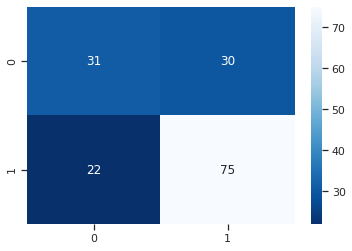

In [60]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.show()

Нам важна точность предсказания вкуса молока.
Мы обращаем внимание на ошибки первого рода: когда модель предсказыват, что молоко вкусное, а на самом деле оно не вкусное (30 случаев). 
Будем пользоваться инструментом оценки качества модели Precision.  

In [61]:
pred = clf.predict_proba(X_test)[:,1]>=0.7
print(recall_score(y_test, pred), precision_score(y_test, pred))

0.28865979381443296 0.8


In [62]:
tp, fp, fn = 0, 0, 0
for t, p in zip(y_test, pred):
    if t==1 and p==1:
        tp+=1
    if t==1 and p==0:
        fn+=1 
    if t==0 and p==1:
        fp+=1 
print(tp/(tp+fn), tp/(tp+fp))

0.28865979381443296 0.8


In [63]:
for threshold in np.arange(0, 1, 0.1):
    y_pred = clf.predict_proba(X_test)[:,1]>=threshold
    print(np.round(threshold,2), np.round(recall_score(y_test, y_pred),2), np.round(precision_score(y_test, y_pred),2))

0.0 1.0 0.61
0.1 1.0 0.61
0.2 1.0 0.61
0.3 0.98 0.64
0.4 0.9 0.66
0.5 0.77 0.71
0.6 0.58 0.79
0.7 0.29 0.8
0.8 0.1 0.91
0.9 0.0 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


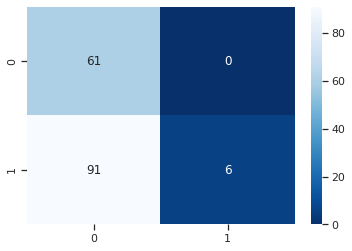

In [64]:
pred = clf.predict_proba(X_test)[:,1]>=0.83
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues_r')
plt.show()

Выбираем порог 0.83, при котором ошибка 1 класса становится нулевой.

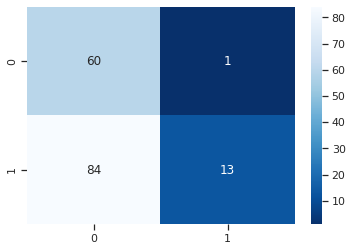

In [65]:
pred = clf.predict_proba(X_test)[:,1]>=0.78
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues_r')
plt.show()

Потенциальный альтернативный вариант с порогом 0.78

In [66]:
pred = clf.predict_proba(X_test)[:,1]>=0.83
display(pred)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [67]:
display(ferma_main1.head(5))

cow_buy_merged1['удой']=cow_buy_merged1['удой2']
display(cow_buy_merged1.head(5))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус,возраст,спо2,эке2,вкус_нум
0,1,5863.0,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,1
1,2,5529.0,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,1
2,3,5810.0,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,0
3,4,5895.0,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,0
4,5,5302.0,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,1


,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,спо,эке2,сырой_протеин,имя_папы2,спо2,удой2,удой
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,1,0.957062,220.685031,2018.054960,айдиалгеркулес,0,6125.958159,6125.958159
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,0.957062,220.685031,2018.054960,соверинбуйный,0,5870.057722,5870.057722
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,1,0.961263,228.559324,2021.684766,соверинбарин,1,6270.293019,6270.293019
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,1,0.961263,228.559324,2021.684766,айдиалбуйный,1,6577.146960,6577.146960
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,1,0.961263,228.559324,2021.684766,айдиалбуйный,1,6524.502967,6524.502967


In [68]:
cow_buy_merged1['возраст'] = cow_buy_merged1['возраст'].str.replace( '0', 'менее_2_лет')
cow_buy_merged1['возраст'] = cow_buy_merged1['возраст'].str.replace( '1', 'более_2_лет')

cat_col_names11 = ['возраст', 'порода', 'тип_пастбища', 'порода_папы', 'спо2']
num_col_names11 = ['эке2','сырой_протеин', 'жирность', 'белок']

data_cow_encoded = encoder.transform(cow_buy_merged1[cat_col_names11])
data_cow_scaled = scaler.transform(cow_buy_merged1[num_col_names11])


cow_buy_merged_prep = np.hstack([data_cow_encoded, data_cow_scaled])

pred1 = clf.predict_proba(cow_buy_merged_prep)[:,1]>=0.83
pred2 = clf.predict_proba(cow_buy_merged_prep)[:,1]>=0.78

cow_buy_merged1['вкус_1'] = pred1
cow_buy_merged1['вкус_2'] = pred2

result = ['порода', 'тип_пастбища', 'возраст', 'имя_папы', 'порода_папы', 
          'спо', 'эке2', 'жирность', 'белок', 'удой2', 'вкус_1', 'вкус_2']
display(cow_buy_merged1[result].head(20))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,порода,тип_пастбища,возраст,имя_папы,порода_папы,спо,эке2,жирность,белок,удой2,вкус_1,вкус_2
0,вис бик айдиал,холмистое,более_2_лет,геркулес,айдиал,0.957062,220.685031,3.58,3.076,6125.958159,False,True
1,вис бик айдиал,равнинное,менее_2_лет,буйный,соверин,0.957062,220.685031,3.54,3.081,5870.057722,False,False
2,рефлешнсоверинг,равнинное,более_2_лет,барин,соверин,0.961263,228.559324,3.59,3.074,6270.293019,False,False
3,рефлешнсоверинг,холмистое,более_2_лет,буйный,айдиал,0.961263,228.559324,3.40,3.061,6577.146960,False,False
4,рефлешнсоверинг,равнинное,более_2_лет,буйный,айдиал,0.961263,228.559324,3.64,3.074,6524.502967,False,False
5,рефлешнсоверинг,равнинное,менее_2_лет,геркулес,соверин,0.961263,228.559324,3.63,3.053,6322.916566,False,False
6,вис бик айдиал,равнинное,более_2_лет,буйный,соверин,0.957062,220.685031,3.57,3.079,6078.232427,False,False
7,рефлешнсоверинг,холмистое,менее_2_лет,буйный,айдиал,0.961263,228.559324,3.40,3.079,6368.972255,False,False
8,вис бик айдиал,холмистое,более_2_лет,соловчик,соверин,0.957062,220.685031,3.73,3.055,5924.505070,False,False
9,рефлешнсоверинг,равнинное,более_2_лет,геркулес,соверин,0.961263,228.559324,3.73,3.073,6531.091271,False,False


#### Вывод

В данной части исследования было сконструирована модель логистической регрессии.   
В качестве коррелирующих признаков были приняты те, которые отражают условия содержания, возраст, качество питания, качество молока и происхождение коров.  
Было определено предсказание по вкусу молока.    
Был выбран порог причисления к классу в 0.83, который бы обеспечил нам требуемую точность причисления молока к категории "вкусного".    
Модель не выдала вариантов коров с вкусным молоком (столбец "вкус_1").    
В качестве альтернативной модели прогнозирования была применена модель с порогом в 0.78.   
Она даёт минимальную вариативность к выбору покупки коров: моделью предсказано вкусное молоко у трёх коров с индексами 0, 11, 13 (столбец "вкус_2)".  
Однако больше 6000 кг удоя из них даёт лишь корова с индексом 0.


## Итоговые выводы

В ходе исследования были предприняты следующие действия:    
1) Изучение общей информации:  
    
Данные были загружены и представлены в трёх таблицах: ferma_main.csv, ferma_dad.csv, cow_buy.csv.  
В первой таблице 12 столбцов и 634 строк, во второй 2 столбца и 629 строк, в третей - 7 столбцов и 20 строк.    
Было замечено, что количество строк в таблицах ferma_main.csv и ferma_dad.csv не совпадают.   
На этапе предобработки данных это исправлено.    
Характеристики в столбцах совпадают с заявленными в техническом задании.    
Названия столбцов были приведены к нижнему регистру.  
Также названия были укорочены для удобства обращения к конкрентным столбцам.    

2) Предобработка данных:      
    
Были заменены значения в столбцах "вкус" и "возраст" на бинарные 0 и 1 для простоты расчётов.  
Были удалены явные и неявные дубликаты (ошибки при написании данных).  
Благодаря этому количеству строк в первых двух таблицах совпадает.   
Вся текстовая информация приведена к нижнему регистру.  
Пропуски не были обнаружены.         

3) Исследовтельский анализ данных:    
    
Был проведён статистический анализ таблицы ferma_main. Были выявлены следующие осоебнности:
- Коров старше 2-ух лет 83%, остальные - моложе 2-ух лет
- 59% молока - вкусное
- 51% пап-быков породы айдал, остальные 49% - соверин
- 59% коров породы Вис Бик Айдиал, остальные 41% - породы РефлешнСоверинг
- Распределению по проценту белка имеет нормальный вид, среднее и медианное значение близки. Замечено небольшое количество выборосов.
- в столбце "удой" наблюдается один очевидный выброс, который оказывает сильное влияние на наблюдение. Среднее (6125) и медианное (6133) близки.
5% значение меньше 5359, 99% значений меньше 7138. Распределение имеет нормальный вид со скосом вправо, превалируют низкие показатели.
- Распределение по ЭКЕ имеет нормальный вид со скосом влево, превалируют высокие показатели. Среднее (14.5438) и медианное (14.7) значения близки.
- Распределение по количеству сырого протеина смещено вправо, превалируют низкие показатели.
Среднее (1923.36) и медианное(1888) значения близки.
- Распределение по СПО сильно спещено вправо, превалируют высокие показатели.
Среднее (0.913) и медианное(0.93) сильно различаются.
- Распределение по проценту жирности сильно смещено влево. Среднее (3.603) и медианное(3.65) сильно различаются. Замечено большое количество выбросов в меньшую сторону.  
  
4) Корреляционный анализ данных:   
    
- Сильнее всего показатели удоя корреклируют с параметрами "эке", "сырой_проетин", "спо", "жирность". С показателем белка почти не коррелирует.  
- Взаимосвязь удоя с ЭКЕ нелинейная. Нужно ввести квадрат этого параметра.  
- Мультиколлинеарность между признаками не наблюдается    
- Взаимосвязь удоя и СПО нелинейна, СПО можно перевести в категориальный вид.    
- Очевидно, что сильнее всего на количество производимого молока влияет прежде всего качество потребляемой пищи и условия пастбищ. Из количественных показателей это "эке", "спо" и "Сырой протеин".   
    Из категориальных : "порода", "возраст", "порода папы", "тип пастбища" и "имя папы". Будем учитывать это при построении моделей прогнозирования удоя.  
- Исключаем из рассмотрения показатели качества молока : "белок" и "жирность"         

5) Построение линейных моделей для прогнозирования удоя:  
    
- В данной части работы были разработаны три модели линейной регрессии.  
- В качестве целевых численных параметров были взяты "эке" и "спо" и "сырой_протеин", отражающие качество питания коров.  
- Категориальными признаками были взяты все остальные параметры, кроме "вкус", "жирность" и "белок" - они отражают качество молока.  
- Качество каждой из них было оценено с помощью метрик R2, MAE, MSE, RMSE.  
- Модель 1:  
R2  = 0.819
MAE  = 181
MSE = 49615
RMSE = 223     
- Модель 2:  
R2  = 0.844
MAE = 164
MSE = 42834
RMSE = 207     
- Модель 3:  
R2  = 0.863
MAE  = 153
MSE = 37651
RMSE = 194       
- Была выявлена наилучшая модель - третья имеет показатель R2 ближайший к еденице, а показатели MAE, MSE, RMSE ближе к нулю.   
- Резултат показывает нам правильность действий в ходе адаптации данных при построении третьей модели:  
    - была устранена нелинейность зависимости целевого и выходных данных (возведением в квадрат показателя "эке", перевод признака "спо" в категориальный)    
    - добавлена категория "имя_папы"  
- Доверительный интервал удоя был взят в границах от 5 до 95% всех показателей и составил 5341 - 6697 (кг).   
- Было составлено предсказание по третьей модели на удой для коров, рассматриваемых к приобретению. Данные добавлены в таблицу.  
- Все предсказанные значения попали внутрь доверительного интервала, что отражает корректность работы модели.    

6) Построение логистической модели для прогнозирования вкуса молока.    

В данной части исследования было сконструирована модель логистической регрессии.  
В качестве коррелирующих признаков были приняты те, которые отражают условия содержания, возраст, качество питания, качество молока и происхождение коров.  
Было определено предсказание по вкусу молока.  
Был выбран порог причисления к классу в 0.83, который бы обеспечил нам требуемую максимальную точность причисления молока к категории "вкусного".  
Модель не выдала вариантов коров с вкусным молоком.    

В качестве альтернативной модели прогнозирования была применена модель с порогом в 0.78.  
Она даёт минимальную вариативность к выбору покупки коров: моделью предсказано вкусное молоко у трёх коров с индексами 0, 11, 13.  
    
7) Вывод и предложение:  
    
Сопоставив два прогноза - по удою и вкусу - и строго следуя требованиям фермерм, невозможно предложить ни одну из рассматриваемых коров.  
Тем не менее, если потребность в расширении производства критическая, по альтернативной модели прогнозирования с точностью на 5% ниже, прогноз предлагает к приобретению корову с индексом 0 и удоем 6125 кг.  

    
